In [390]:
import pandas as pd
import numpy as np

In [391]:
#Fetch the data
df=pd.read_csv(r"C:\\Users\\taran\\OneDrive\\Desktop\\Destination\\Udemy_Data Analyst_bootcamp\\archive\\earthquakes_NZ.csv")

In [392]:
df.head()

,origintime,longitude,latitude,depth,magnitude
0,2020-05-3023:45:48.085,174.923615,-40.474628,26.321213,2.876071
1,2020-05-3023:32:47.780,176.074890,-38.658043,4.646020,1.923497
2,2020-05-3023:27:25.764,168.484024,-44.222923,5.000000,3.263409
3,2020-05-3022:58:53.704,172.875793,-40.950115,162.780197,2.016822
4,2020-05-3022:44:29.057,176.212311,-38.070496,143.510757,2.386887


In [393]:
df.describe()

,longitude,latitude,depth,magnitude
count,20648.000000,20648.000000,20648.000000,20648.000000
mean,168.815327,-39.695796,44.781349,2.076893
std,47.871845,2.173137,59.572174,0.732382
min,-179.984634,-49.053341,0.000000,-0.061550
25%,174.445881,-40.739138,8.006867,1.625880
50%,175.843956,-39.410406,21.070947,2.011997
75%,176.780491,-38.446671,45.039307,2.415889
max,179.994247,-32.291981,580.009338,5.997482


In [394]:
#checking for the data types of the columns
df.dtypes

origintime     object
longitude     float64
 latitude     float64
 depth        float64
 magnitude    float64
dtype: object

In [395]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20648 entries, 0 to 20647
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   origintime  20648 non-null  object 
 1   longitude   20648 non-null  float64
 2    latitude   20648 non-null  float64
 3    depth      20648 non-null  float64
 4    magnitude  20648 non-null  float64
dtypes: float64(4), object(1)
memory usage: 806.7+ KB


In [396]:
## Check for missing values
df.isnull().sum()
df.isnull().any(axis=0)

origintime    False
longitude     False
 latitude     False
 depth        False
 magnitude    False
dtype: bool

In [397]:
#Renaming Columns
df = df.rename(columns={"origintime": "Time", "longitude": "Long", " latitude": "Lat", " depth": "Depth", " magnitude": "Magnitude"})
df.head(10)

,Time,Long,Lat,Depth,Magnitude
0,2020-05-3023:45:48.085,174.923615,-40.474628,26.321213,2.876071
1,2020-05-3023:32:47.780,176.074890,-38.658043,4.646020,1.923497
2,2020-05-3023:27:25.764,168.484024,-44.222923,5.000000,3.263409
3,2020-05-3022:58:53.704,172.875793,-40.950115,162.780197,2.016822
4,2020-05-3022:44:29.057,176.212311,-38.070496,143.510757,2.386887
5,2020-05-3021:53:56.245,174.927948,-40.460606,27.216068,3.802766
6,2020-05-3021:12:00.345,174.925674,-40.454571,26.135881,1.967753
7,2020-05-3021:04:35.642,174.914337,-40.455555,27.039436,1.688018
8,2020-05-3020:53:17.274,174.934280,-40.457779,27.589674,2.321019
9,2020-05-3020:21:29.326,175.513428,-39.943562,32.669422,2.546814


In [398]:
df.dtypes

Time          object
Long         float64
Lat          float64
Depth        float64
Magnitude    float64
dtype: object

In [399]:
#Converting Depth & Magnitude columns to Float
for col in ['Depth', 'Magnitude']:
    df[col] = df[col].astype('float')

#Converting Time column to datetime
df['Time'] =  pd.to_datetime(df['Time'], format='%Y-%m-%d%H:%M:%S.%f')

In [400]:
df.dtypes

Time         datetime64[ns]
Long                float64
Lat                 float64
Depth               float64
Magnitude           float64
dtype: object

## ANALYSIS ##

 Trends in the average magnitude of events at different depth ranges over time.

In [401]:
#Monthly average of Magnitude
#Exploring the Relationship Between Depth and Magnitude, Grouped by Time 
df1 = df.copy()
print(type(df1))
#Set the Time column as the index
df1 = df1.set_index('Time')##, inplace=True)
df1.head(10)


<class 'pandas.core.frame.DataFrame'>


,Long,Lat,Depth,Magnitude
Time,,,,
2020-05-30 23:45:48.085,174.923615,-40.474628,26.321213,2.876071
2020-05-30 23:32:47.780,176.074890,-38.658043,4.646020,1.923497
2020-05-30 23:27:25.764,168.484024,-44.222923,5.000000,3.263409
2020-05-30 22:58:53.704,172.875793,-40.950115,162.780197,2.016822
2020-05-30 22:44:29.057,176.212311,-38.070496,143.510757,2.386887
2020-05-30 21:53:56.245,174.927948,-40.460606,27.216068,3.802766
2020-05-30 21:12:00.345,174.925674,-40.454571,26.135881,1.967753
2020-05-30 21:04:35.642,174.914337,-40.455555,27.039436,1.688018
2020-05-30 20:53:17.274,174.934280,-40.457779,27.589674,2.321019


## Visual Map indicates  specific magnitude-depth combinations being strictly tied to particular months in this 10-month span

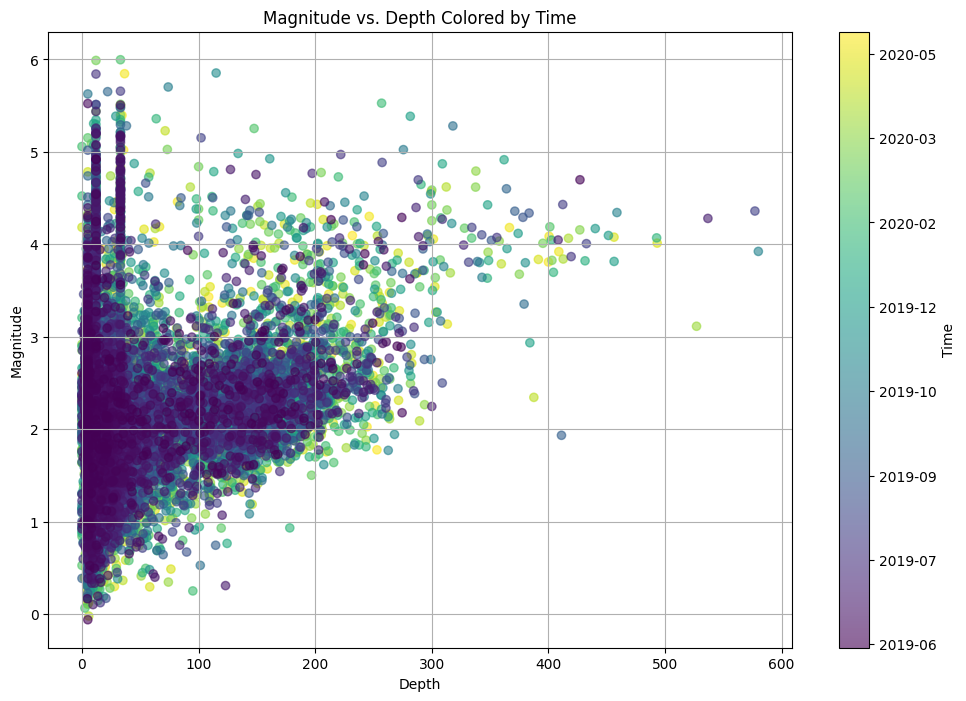

In [406]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Assuming df1 has 'Time' as index (DatetimeIndex), 'Depth', and 'Magnitude' columns
# AND 'Lat' and 'Long' columns

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df1['Depth'], df1['Magnitude'], c=mdates.date2num(df1.index), cmap='viridis', alpha=0.6)
cbar = plt.colorbar(scatter, label='Time')
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.title('Magnitude vs. Depth Colored by Time')
plt.grid(True)
plt.show()

Inference from the Plot

a) Dominance of Shallow Events: The vast majority of earthquake events appear to be concentrated at shallower depths (closer to 0 on the x-axis). As depth increases, the number of recorded events seems to decrease significantly.

b) Magnitude Distribution Across Depths

Shallow Depths: Shallow earthquakes exhibit a wide range of magnitudes, from very low (near 0) up to around 6.

Intermediate Depths: As depth increases (moving to the right on the x-axis), the maximum observed magnitude seems to trend downwards. Very high magnitude events (above 5.5) are less frequent at greater depths within this dataset's range.

Deeper Depths: The few events recorded at the greatest depths in this dataset appear to have a more limited range of magnitudes, generally on the lower to mid end of the scale (mostly below 4).

c)Temporal Trends (indicated by color):
 No Obvious Strong Temporal Clusters for Magnitude at Specific Depths: While the color varies across the plot, suggesting events occurred throughout the observed time period at different depths and magnitudes, there aren't immediately obvious clusters of specific colors (representing specific time periods) concentrated in particular regions of the magnitude-depth space. This suggests that high or low magnitude events at certain depths weren't strictly limited to specific months within this timeframe.


d) Distribution of Time Across All Depths: 
Events from the entire time range (July 2019 to May 2020) appear to be distributed across the range of recorded depths, although the sheer number of shallow events makes it visually denser.